In [1]:
putStrLn "Hello world!"

Hello world!

Haskell es un lenguaje puramente orientado a la programacion funcional. 

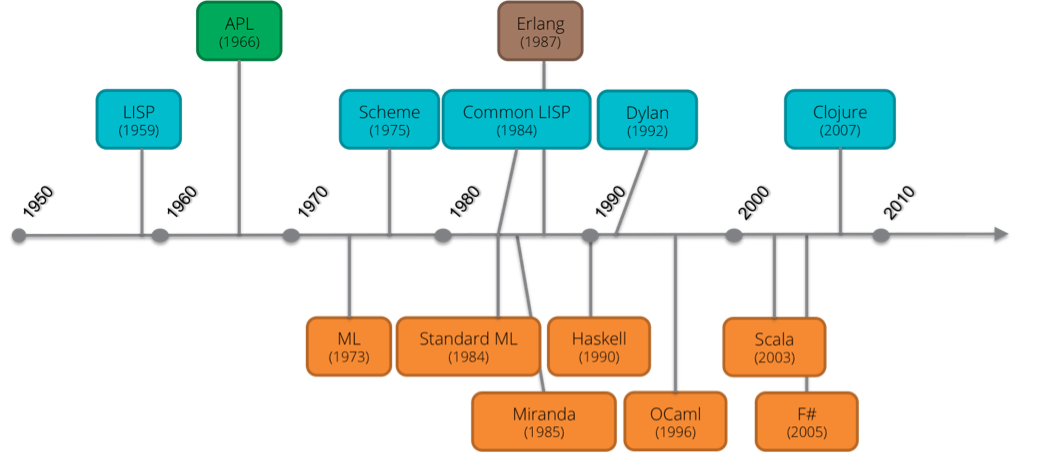

En la “Conferencia sobre Lenguajes de Programación Funcional y Arquitecturas de Ordenador” aparecio la idea un lenguaje funcional estandarizado y libre. 

[<img src="https://imgs.xkcd.com/comics/standards.png">]()

Haskell lleva ese nombre en honor al matemático Haskell Curry, quien hizo grandes aportes al concepto de Currying.

[<img src="http://s3.amazonaws.com/lyah/curry.png">]()

In [11]:
ejemplo :: Int -> Int -> Int
ejemplo a b = a*b
print $ ejemplo 2 3

mult2 = ejemplo 2
print $ mult2 3

6

6

# Features
* Purity
* Laziness
* Strong typing
* Memory managed
* Elegance
* Modular

## Listas infinitas?

In [22]:
pares = [2,4..]
print $ take 50 pares

[2,4,6,8,10,12,14,16,18,20]

* Equivalente C:

```C
for(int i=1;i<=50;printf("%d, ",i*2));
```

* Equivalente Python:

```Python
print " ".join([str(x*2) for x in range(51)])
```

* Listas infinitas en python:
```Python
def pares():
    i = 2
    while True:
        yield i
        i += 2
```

## List comprehensions

In [8]:
print [x | x <- [1..50], (x `mod` 2) /= 1]

[2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50]

## Pattern matching

In [14]:
valor :: Int -> String
valor 1 = "Uno"
valor 2 = "Dos"
valor 3 = "Tres"
valor x = "No se"

print $ valor 1
print $ valor 2
print $ valor 3
print $ valor 1000

"Uno"

"Dos"

"Tres"

"No se"

# Memory allocation

> Most objects die young

Hipotesis generacional

### Garbage collector
* stop-the-world
* paralelo
* generacional 
* copiado

"Nursery" de 512kB

[<img src="https://davidterei.com/talks/2011-11-cs240h/gc.png">]()

Threads
Tipos de datos

# Casos de uso

[<img src="https://raw.githubusercontent.com/facebook/Haxl/master/logo.png">]()

El servicio Sigma es el responsable de clasificar contenido en Facebook como sospechoso de spam o contenido peligroso. Actualmente se basa en una implementacion open source de una biblioteca llamada Haxl.

[<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Elm_logo.svg/240px-Elm_logo.svg.png" width="250">](Elm)

El compilador del lenguaje Elm esta desarrollado en Haskell.

[<img src="https://d21buns5ku92am.cloudfront.net/46049/images/150798-Chordify%C2%AE_logo_100%25_green-9ea4b6-medium-1417728929.jpg" width="250">](Chordify)

Chordify es un servicio online que transforma musica en acordes.

[<img src="http://www.ganeti.org/images/ganeti-logo.png" width="250">](Ganeti)

Ganeti es una herramienta desarrollada por Google para el manejo de clusters de servidores virtuales.

[<img src="https://a1.nyt.com/assets/homepage/20171018-133349/images/foundation/logos/nyt-logo-379x64.png" width="250">](NYT)

El New York Times usa una bibliotecca de Haskell para procesar imagenes desde 2013. Su decision se baso en la presencia de paquetes de alta performance de arreglos numericos y su facilidad de paralelizacion. 

# Lenguajes inspirados por Haskell

[<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Elm_logo.svg/240px-Elm_logo.svg.png" width="250">](Elm)


[<img src="http://www-ps.informatik.uni-kiel.de/currywiki/_media/curry_2.png" width="250">](Curry)

[<img src="http://taylor.fausak.me/static/images/2015/10/22/purescript.svg"  width="250">](PureScript)



